In [1]:
# Creat By GF 2023-07-19

# Python3_Project_商品维度分析.ipynb

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import squarify

In [5]:
# 导入计算好的数据。

import Python3_Project_RFM_Building_Data

df = Python3_Project_RFM_Building_Data.df

In [6]:
# 先把年份和月份提取出来。

df["year"] = df["time"].dt.year
df["month"] = df["time"].dt.month

In [53]:
# 水果年度销量占比。

df_year_fruit = df.groupby(["year","fruit"]).agg({"kilogram":"sum","amount":"sum"}).reset_index()
df_year_fruit["year"] = df_year_fruit["year"].astype(str)
df_year_fruit["amount"] = df_year_fruit["amount"].apply(lambda x: round(x,2))

df_year_fruit.head()

,year,fruit,kilogram,amount
0,2019,哈密瓜,2927,46246.6
1,2019,桃子,2590,18130.0
2,2019,梨,3758,21796.4
3,2019,橙子,4094,27839.2
4,2019,芭乐,2804,13739.6


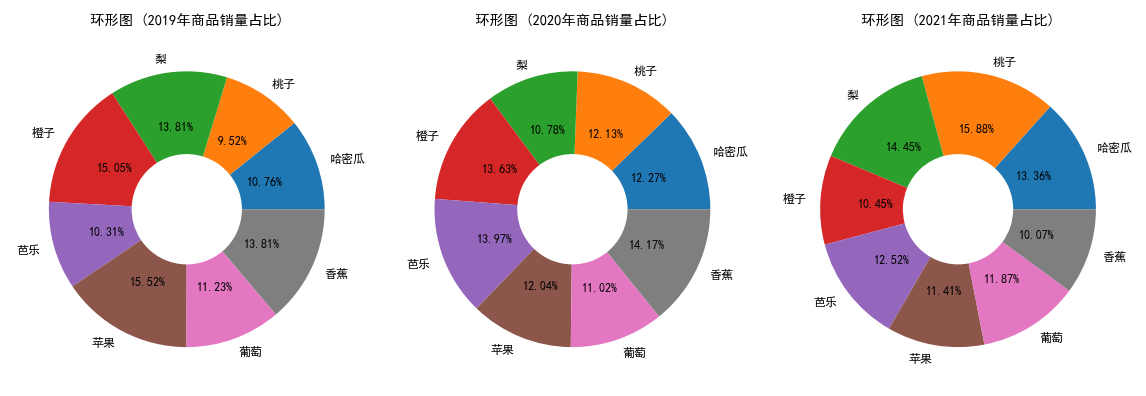

In [73]:
# 环形图 (各年商品销量占比)。

# 指定默认字体(解决中文无法显示的问题)。
plt.rcParams['font.sans-serif'] = ['SimHei']

# 解决保存图像时负号“-”显示方块的问题。
plt.rcParams['axes.unicode_minus'] = False

# 设置字体大小(全局生效)。
plt.rcParams['font.size'] = 6

# 创建一个10*32点的图，设置分辨率为72。
fig = plt.figure(figsize=(10, 32), dpi=144)

# --------------------------------------------------

ax1 = plt.subplot2grid((10, 32), (0, 0), rowspan=10, colspan=10)
# 环形图：通过参数 wedgeprops={'width':0.5} 绘制，自定义数值 0.6 表示环形图的宽度。
ax1.pie(df_year_fruit[df_year_fruit.year == "2019"]["kilogram"], labels=df_year_fruit[df_year_fruit.year == "2019"]["fruit"], autopct='%1.2f%%', wedgeprops={'width':0.6})
ax1.set_title("环形图 (2019年商品销量占比)")

ax2 = plt.subplot2grid((10, 32), (0, 11), rowspan=10, colspan=10)
# 环形图：通过参数 wedgeprops={'width':0.5} 绘制，自定义数值 0.6 表示环形图的宽度。
ax2.pie(df_year_fruit[df_year_fruit.year == "2020"]["kilogram"], labels=df_year_fruit[df_year_fruit.year == "2020"]["fruit"], autopct='%1.2f%%', wedgeprops={'width':0.6})
ax2.set_title("环形图 (2020年商品销量占比)")

ax3 = plt.subplot2grid((10, 32), (0, 22), rowspan=10, colspan=10)
# 环形图：通过参数 wedgeprops={'width':0.5} 绘制，自定义数值 0.6 表示环形图的宽度。
ax3.pie(df_year_fruit[df_year_fruit.year == "2021"]["kilogram"], labels=df_year_fruit[df_year_fruit.year == "2021"]["fruit"], autopct='%1.2f%%', wedgeprops={'width':0.6})
ax3.set_title("环形图 (2021年商品销量占比)")

# --------------------------------------------------

plt.show()

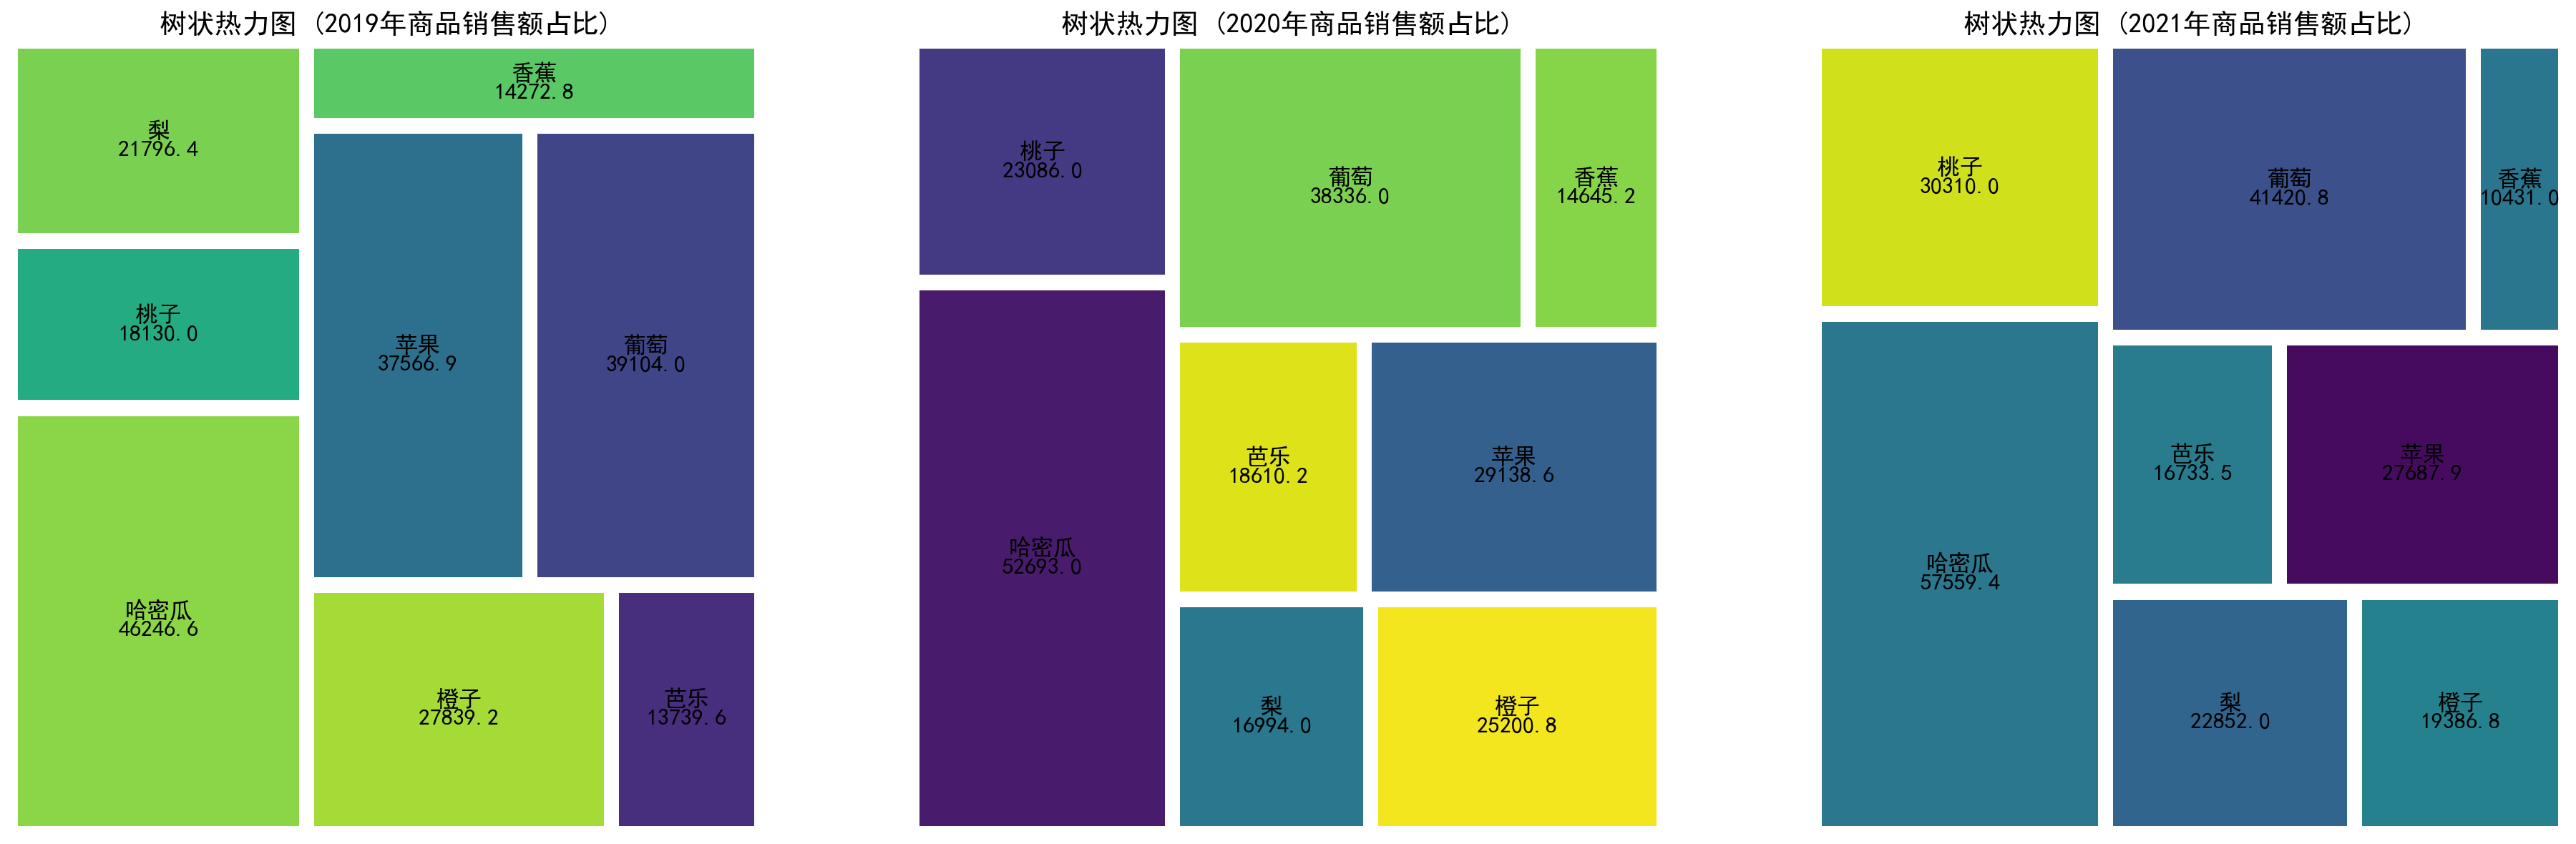

In [49]:
# 水果年度销售额占比。

# 指定默认字体(解决中文无法显示的问题)。
plt.rcParams['font.sans-serif'] = ['SimHei']

# 解决保存图像时负号“-”显示方块的问题。
plt.rcParams['axes.unicode_minus'] = False

# 设置字体大小(全局生效)。
plt.rcParams['font.size'] = 16

# 创建一个32*10点的图，设置分辨率为144。
fig = plt.figure(figsize=(32, 10), dpi=144)

# --------------------------------------------------

plt.subplot(1,3,1)
squarify.plot(df_year_fruit[df_year_fruit.year == "2019"]["amount"],
              #color=['red', 'green', 'blue', 'orange'],
              label=df_year_fruit[df_year_fruit.year == "2019"]["fruit"],
              value=df_year_fruit[df_year_fruit.year == "2019"]["amount"],
              pad=True)
plt.title("树状热力图 (2019年商品销售额占比)")
plt.axis('off')

plt.subplot(1,3,2)
squarify.plot(df_year_fruit[df_year_fruit.year == "2020"]["amount"],
              #color=['red', 'green', 'blue', 'orange'],
              label=df_year_fruit[df_year_fruit.year == "2020"]["fruit"],
              value=df_year_fruit[df_year_fruit.year == "2020"]["amount"],
              pad=True)
plt.title("树状热力图 (2020年商品销售额占比)")
plt.axis('off')

plt.subplot(1,3,3)
squarify.plot(df_year_fruit[df_year_fruit.year == "2021"]["amount"],
              #color=['red', 'green', 'blue', 'orange'],
              label=df_year_fruit[df_year_fruit.year == "2021"]["fruit"],
              value=df_year_fruit[df_year_fruit.year == "2021"]["amount"],
              pad=True)
plt.title("树状热力图 (2021年商品销售额占比)")
plt.axis('off')

# --------------------------------------------------

plt.show()

In [50]:
# 商品月度销量变化。

In [51]:
# 同时提取年份和月份。
df["year_month"] = df["time"].dt.strftime('%Y%m')

df

,time,fruit,name,kilogram,price,region,amount,year,month,year_month
0,2019-01-01,苹果,Michk,66,8.9,华北,587.4,2019,1,201901
1,2019-01-02,梨,Xiaoming,63,5.8,华北,365.4,2019,1,201901
2,2019-01-03,葡萄,Lym,90,12.8,西北,1152.0,2019,1,201901
3,2019-01-04,香蕉,Mike,77,3.8,华南,292.6,2019,1,201901
4,2019-01-05,橙子,Jhon,50,6.8,华中,340.0,2019,1,201901
...,...,...,...,...,...,...,...,...,...,...
1091,2021-12-27,苹果,Michk,88,8.9,华北,783.2,2021,12,202112
1092,2021-12-28,橙子,Jhon,68,6.8,华中,462.4,2021,12,202112
1093,2021-12-29,梨,Jimmy,87,5.8,华北,504.6,2021,12,202112
1094,2021-12-30,芭乐,Xiaoming,56,4.9,华南,274.4,2021,12,202112


In [67]:
df_year_month_fruit = df.groupby(["year_month", "fruit"])["amount"].sum().reset_index()

df_year_month_fruit

,year_month,fruit,amount
0,201901,哈密瓜,6414.8
1,201901,梨,1374.6
2,201901,橙子,1224.0
3,201901,芭乐,1298.5
4,201901,苹果,5402.3
...,...,...,...
274,202112,橙子,3536.0
275,202112,芭乐,563.5
276,202112,苹果,2723.4
277,202112,葡萄,3174.4


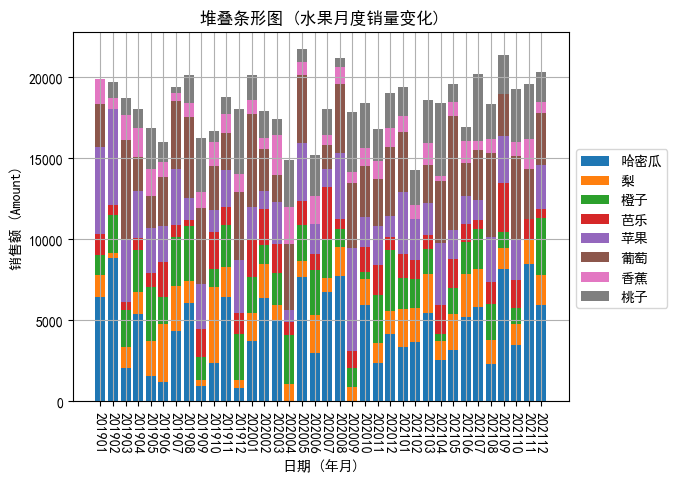

In [69]:
# 堆叠条形图 (水果月度销量变化)。

# 找出某些水果在哪些月份没有销售，并填充 0.0 便于绘图。
for YM in df_year_month_fruit["year_month"].drop_duplicates():
    
    for F in df_year_month_fruit["fruit"].drop_duplicates():
        
        df_filter_res = df_year_month_fruit[(df_year_month_fruit.year_month == YM) & (df_year_month_fruit.fruit == F)]
        
        if df_filter_res.empty == True:
            
            new_line = {"year_month": YM, "fruit": F, "amount": 0.0}     
            
            df_year_month_fruit = df_year_month_fruit.append(new_line, ignore_index=True)     
            
        else:         
            pass

# --------------------------------------------------

df_year_month_fruit = df_year_month_fruit.sort_values(by='year_month').reset_index(drop=True)
            
# --------------------------------------------------

# 指定默认字体(解决中文无法显示的问题)。
plt.rcParams['font.sans-serif'] = ['SimHei']

# 解决保存图像时负号“-”显示方块的问题。
plt.rcParams['axes.unicode_minus'] = False

# 设置字体大小(全局生效)。
plt.rcParams['font.size'] = 10

# --------------------------------------------------

ListFruit = df_year_month_fruit["fruit"].drop_duplicates()

ListYearMonth = df_year_month_fruit["year_month"].drop_duplicates()

X = ListYearMonth

ListBottom = [i - i for i in range(len(ListYearMonth))]

for i in range(len(ListFruit)):
    
    if i == 0:
        
        Y = df_year_month_fruit[df_year_month_fruit.fruit == ListFruit[i]]["amount"]
        
        plt.bar(X, Y, bottom=0, label=ListFruit[i])
        
        ListY = Y.values.tolist()
        
        ListBottom = [n + m for n, m in zip(ListBottom, ListY)]
        
    elif i != 0:
        
        Y = df_year_month_fruit[df_year_month_fruit.fruit == ListFruit[i]]["amount"]
        
        plt.bar(X, Y, bottom=ListBottom, label=ListFruit[i])
        
        ListY = Y.values.tolist()
        
        ListBottom = [n + m for n, m in zip(ListBottom, ListY)]

# --------------------------------------------------

plt.title("堆叠条形图 (水果月度销量变化)")
plt.xticks(rotation=-90) # -> 将 X 轴刻度标签旋转 90 度 (正数为逆时针，负数为顺时针)。
plt.xlabel("日期 (年月)")
plt.ylabel("销售额 (Amount)")
plt.grid(True)
# bbox_to_anchor 设置图例位置，参照官网，(1.0, 0.7) 这个数值将图例设置到图像外侧右边中间。
plt.legend(bbox_to_anchor=(1.0, 0.7))

plt.show()

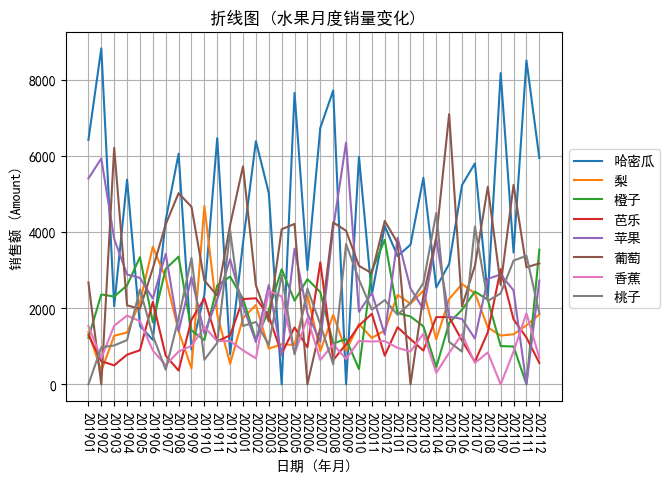

In [72]:
# 折线图 (水果月度销量变化)。

# 指定默认字体(解决中文无法显示的问题)。
plt.rcParams['font.sans-serif'] = ['SimHei']

# 解决保存图像时负号“-”显示方块的问题。
plt.rcParams['axes.unicode_minus'] = False

# 设置字体大小(全局生效)。
plt.rcParams['font.size'] = 10

# --------------------------------------------------

ListFruit = df_year_month_fruit["fruit"].drop_duplicates()

ListYearMonth = df_year_month_fruit["year_month"].drop_duplicates()

X = ListYearMonth

for F in ListFruit:
        
    Y = df_year_month_fruit[df_year_month_fruit.fruit == F]["amount"]
        
    plt.plot(X, Y, label=F)

# --------------------------------------------------

plt.title("折线图 (水果月度销量变化)")
plt.xticks(rotation=-90) # -> 将 X 轴刻度标签旋转 90 度 (正数为逆时针，负数为顺时针)。
plt.xlabel("日期 (年月)")
plt.ylabel("销售额 (Amount)")
plt.grid(True)
# bbox_to_anchor 设置图例位置，参照官网，(1.0, 0.7) 这个数值将图例设置到图像外侧右边中间。
plt.legend(bbox_to_anchor=(1.0, 0.7))

plt.show()